In [30]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [13]:
def find_homography(logo_image,discover_image):
    MIN_MATCH_COUNT = 10
    img1 = cv.imread(logo_image,0)          # queryImage
    img2 = cv.imread(discover_image,0) # trainImage
    # Initiate SIFT detector
    sift = cv.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)
        img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
        return img2, [np.int32(dst)],len(good)
    else:
        return img2 , 'no feature matches',len(good)

In [10]:
image,points,match_count= find_homography('box.jpeg','box_in_scene.jpeg')

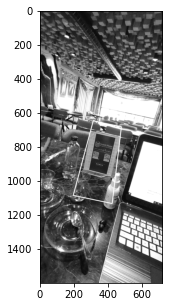

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(image,'gray')

In [28]:
points

[array([[[ 311,  646]],
 
        [[ 194, 1084]],
 
        [[ 422, 1132]],
 
        [[ 476,  680]]])]

In [29]:
match_count

104